In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd

from typing import List, Dict
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
stop_words = set(stopwords.words("english"))

In [3]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

In [4]:
#read the dataset with name "cyber.csv" and store it in a variable df
cyber = pd.read_csv("/home/sangramdh/jupyter/NLP/text_classification/data/cybersecurity_tweets.csv", usecols=['text','label'])

#print the shape of dataframe
print(cyber.shape)

#print top 5 rows
cyber.head()

(200000, 2)


,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1


In [5]:
#read the dataset with name "non_cyber.csv" and store it in a variable df
non_cyber = pd.read_csv("/home/sangramdh/jupyter/NLP/text_classification/data/not_cybersecurity_tweets.csv", usecols=['text', 'label'])

#print the shape of dataframe
print(non_cyber.shape)

#print top 5 rows
non_cyber.head()

(200000, 2)


,text,label
0,"Samsung Galaxy Tab Active Pro review: Rugged, ...",0
1,Malware on Target - Pages 4 and 5 #fnaf See a...,0
2,A curated list of amazingly awesome OSINT: htt...,0
3,Thank you for tipping for Zero-day tokens for ...,0
4,From making sure they don't fall for phishing ...,0


### Check uniques values in "label" column

In [6]:
cyber.label.unique() # for cyber dataset

array(['1', ' #CyberSecurity for Power Systems',
       ' A New Wake Up Call https://t.co/yBYOsLGIfi #cybersecurity',
       ' https://t.co/BenGo8OxLk',
       ' Nursing Essays Criminology English Ecology Literature Law Algebra History Excel Homework #MachineLearning  #DataScience #tech #100DaysOfCode #Python #Cybersecurity #BigData #AI  #DeepLearning #ArtificialIntelligence #NLP #Brands  Dm @GraceyEssays https://t.co/jTjW07Uuym',
       ' Access Requests #GDPR #cybersecurity #security via https://t.co/zeb5hNqb8q https://t.co/20xnomxaZK',
       'quot',
       'Répartition DR  Biden s’entretiendra avec d’autres leaders mondiaux sur les attaques de ransomware. Réunion pour créer une alliance ...   https://t.co/hFe0SwwViK #French https://t.co/3biiMPjKOt',
       ' entenda como a ameaça ransomware age –\xa0Tilt https://t.co/LwI0Tuhf0N',
       ' Tile Trackers & Amazon',
       ' Microsoft Is Exposed | #microsoft | #hacking |\xa0#cybersecurity https://t.co/Mo2L56BjVH',
       ' capturing a

In [7]:
cyber[-10:]

,text,label
199990,I gave +Kred to @Shirastweet on @Kred #influen...,1
199991,AXA pledges to stop reimbursing ransom payment...,1
199992,"""Researchers warn that PrivateLoader pay-per-i...",1
199993,Well... I started the Journey into #CyberSecur...,1
199994,Know More About Cybersecurity and Data Privacy...,1
199995,#Webinar Our so much awaited webinar addressin...,1
199996,"The threat of #ransomware is nothing new, but ...",1
199997,Shadow Code From Third-Party Libraries Is a Ma...,1
199998,"¿""whose our-s-ing as which-s &/or whose-s stat...",1
199999,Senior Manager RGM Retail Programs #Job #Leba...,1


In [8]:
len(cyber.label.unique()) # check count how many uniques are there

952

In [9]:
non_cyber.label.unique() # check for non_cyber dataset

array(['0', ' thousands clicked through https://t.co/k2Q49rERql',
       ' this opens up a whole new window for the bad guys.  https://t.co/V3UclU9qrh  #kubernetes #windows #cyberscurity #malwareattack',
       ..., ' https://t.co/IScXnqp4is',
       " the number of concerned colleagues who generously reach out to let you know you've been used in a phishing attempt ☺️",
       " investigation 'ongoing' https://t.co/h0k4Eq0pOG #uncategorized #feedly"],
      dtype=object)

In [10]:
len(non_cyber.label.unique())

1098

#### I'm getting here at label column in both the dataset, some unique which is not good.
we need to clean that so that we can move forword

In [11]:
cyber['label'] = cyber.label.replace(cyber.label.unique(), 1) # replacing the value for cyber dataset

In [12]:
cyber_labeled = cyber

In [13]:
cyber_labeled.head()

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1


In [14]:
len(cyber_labeled.label.unique())

1

In [15]:
non_cyber['label'] = non_cyber.label.replace(non_cyber.label.unique(), 0)

In [16]:
non_cyber_labeled = non_cyber

In [17]:
non_cyber_labeled.head()

,text,label
0,"Samsung Galaxy Tab Active Pro review: Rugged, ...",0
1,Malware on Target - Pages 4 and 5 #fnaf See a...,0
2,A curated list of amazingly awesome OSINT: htt...,0
3,Thank you for tipping for Zero-day tokens for ...,0
4,From making sure they don't fall for phishing ...,0


In [18]:
len(non_cyber_labeled.label.unique())

1

In [19]:
#check the distribution of labels 
print(non_cyber_labeled['label'].value_counts())

0    200000
Name: label, dtype: int64


### concanet the data frame => cyber_labeled + non_cyber_labeled = data


In [20]:
# concatenating df1 and df2 along rows
data = pd.concat([cyber_labeled, non_cyber_labeled], axis=0, ignore_index=True)
print(data.shape)
data.head()

(400000, 2)


,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1


In [21]:
#check the distribution of labels 
print(data['label'].value_counts())

1    200000
0    200000
Name: label, dtype: int64


In [22]:
len(data.label.unique())

2

In [23]:
data["text"].head()

0    #AI Robo-Advisers and the Future of Financial ...
1    Hackers causing havoc on Mexican banking syste...
2    CVE-2019-13127 An issue was discovered in mxGr...
3    How to protect your online identity #labourcyb...
4    Forensic Acquisition - Shadow Cyber Sec  https...
Name: text, dtype: object

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

### it will take little time

In [25]:
#def preprocess_text(text: str) -> List[str]:
    
corpus = []
for i in range(0, len(data)):
    # Remove links
    text = re.sub(r"http\S+", "", data["text"][i])
    
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    
    text = text.lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )
    text_tokens = word_tokenize(text)
    text_without_stopwords = [ps.stem(word) for word in text_tokens if word not in stop_words]
    text_without_stopwords = ' '.join(text_without_stopwords)
    corpus.append(text_without_stopwords)

In [26]:
corpus[0]

'ai robo advis futur financi advic dataprotect privaci infosec cybersecur bigdata ai'

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

2023-01-20 10:21:12.001306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 10:21:12.271519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 10:21:12.271558: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-20 10:21:13.992915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [28]:
tf.__version__


'2.11.0'

In [31]:
### Vocabulary size
voc_size=500000

In [32]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]

[36537,
 355046,
 456156,
 445267,
 94780,
 479193,
 170645,
 175866,
 430210,
 25193,
 481142,
 36537]

Embedding Representation

In [35]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_docs

array([[     0,      0,      0, ...,  25193, 481142,  36537],
       [     0,      0,      0, ..., 112067, 211862,  25193],
       [     0,      0, 361657, ..., 307947, 395268, 327189],
       ...,
       [     0,      0,      0, ..., 321665, 107510, 378786],
       [     0,      0,      0, ..., 263481, 476324,  53286],
       [     0,      0, 127090, ...,  95187, 427182, 327446]], dtype=int32)

In [36]:
embedded_docs[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
        36537, 355046, 456156, 445267,  94780, 479193, 170645, 175866,
       430210,  25193, 481142,  36537], dtype=int32)

## Creating model

In [37]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

2023-01-20 10:23:07.313440: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-20 10:23:07.313530: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-20 10:23:07.313611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (GaribaITServices): /proc/driver/nvidia/version does not exist
2023-01-20 10:23:07.314467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            20000000  
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20,056,501
Trainable params: 20,056,501
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
len(embedded_docs),data['label'].shape

(400000, (400000,))

In [39]:
X = np.array(embedded_docs)
y = np.array(data['label'])

In [40]:
X.shape, y.shape

((400000, 20), (400000,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
5000/5000 [==============================] - 2425s 484ms/step - loss: 0.0780 - accuracy: 0.9737 - val_loss: 0.0535 - val_accuracy: 0.9813
Epoch 2/10
5000/5000 [==============================] - 2601s 520ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0552 - val_accuracy: 0.9818
Epoch 3/10
5000/5000 [==============================] - 2449s 490ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 4/10
5000/5000 [==============================] - 2471s 494ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0732 - val_accuracy: 0.9814
Epoch 5/10
5000/5000 [==============================] - 2365s 473ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0923 - val_accuracy: 0.9794
Epoch 6/10
5000/5000 [==============================] - 2468s 494ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0961 - val_accuracy: 0.9819
Epoch 7/10
5000/5000 [==============================] - 2477s 495ms/step - loss: 0.0038 - accuracy: 0.9988

### Performance Metrics And Accuracy

In [43]:
y_pre=model.predict(X_test)
y_pre

2500/2500 [==============================] - 37s 14ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [9.9930227e-01],
       ...,
       [1.3556608e-07],
       [3.7779388e-05],
       [1.0000000e+00]], dtype=float32)

In [44]:
len(y_pre), y_pre[0]

(80000, array([1.], dtype=float32))

In [45]:
y_pred = np.round(abs(y_pre))

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sn
import pickle


In [47]:
confusion_matrix(y_test, y_pred)

array([[38980,   969],
       [  784, 39267]])

In [48]:
accuracy_score(y_test,y_pred)

0.9780875

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     39949
           1       0.98      0.98      0.98     40051

    accuracy                           0.98     80000
   macro avg       0.98      0.98      0.98     80000
weighted avg       0.98      0.98      0.98     80000



Text(33.22222222222222, 0.5, 'Truth')

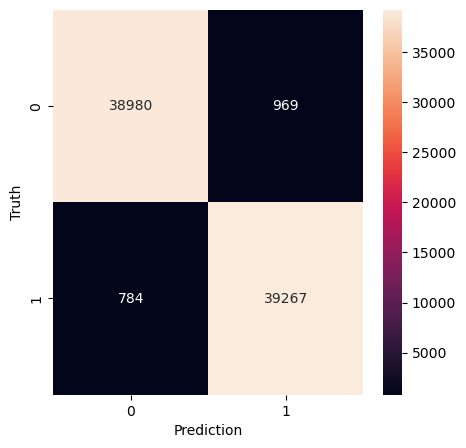

In [55]:
con_m = confusion_matrix(y_test, y_pred)
con_m

plt.figure(figsize = (5,5))
sn.heatmap(con_m, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Plotting accuracy in matplotlib :

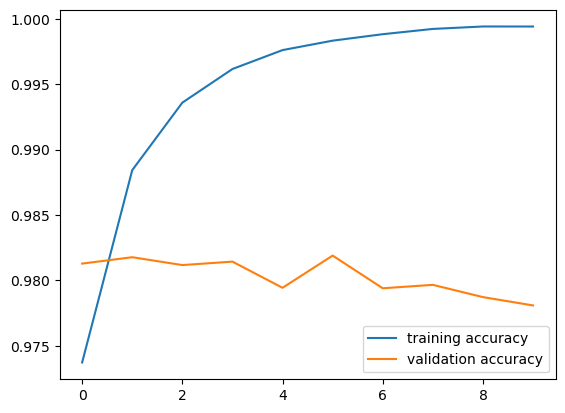

In [51]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

### Plotting loss in matplotlib :

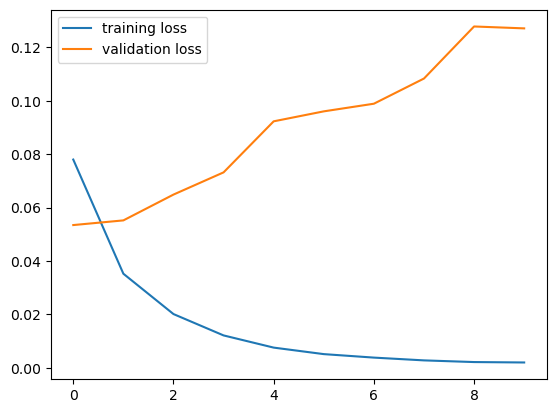

In [52]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [53]:
with open('LSTM_v2.pkl', 'wb') as files:
    pickle.dump(model, files)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-20 17:24:14         2201
metadata.json                                  2023-01-20 17:24:14           64
variables.h5                                   2023-01-20 17:24:14    240703424


In [ ]:
#pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, model, legend=2)

# Adding axes annotations
plt.xlabel('It is a cyber crime')
plt.ylabel('It is not a cyber crime')
plt.title('Logistics on crime-data')
plt.show()

In [ ]:
value=1.5
width=0.75
plot_decision_regions(X_train, y_train, clf=model,
              feature_index=[0,2],                        #these one will be plotted  
              filler_feature_values={1: value, 3:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width})

plt.show()

In [ ]:
# pip install scikit-plot

In [ ]:
import scikitplot as skplt
#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_test, y_pre)
plt.show()

### Test for unseen dataset

In [ ]:
text_dt = data['text'][300000:300006]
text_dt[300004]

In [ ]:

def preprocessAndEncode(text):
    corpus1 = []
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)

    text = text.lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )
    text_tokens = word_tokenize(text)
    text_without_stopwords = [ps.stem(word) for word in text_tokens if word not in stop_words]
    text_without_stopwords = ' '.join(text_without_stopwords)
    corpus1.append(text_without_stopwords)
    onehot_test=[one_hot(words, 5000)for words in corpus1]
    embedded_test=pad_sequences(onehot_test,padding='pre',maxlen=20)
    return embedded_test
    
preprocessAndEncode(text_dt[300004])

In [ ]:
def load_model():
    #return pickle.load(MODELS_PATH)

    # Open the file in binary mode
    with open("LSTM.pkl", 'rb') as file:
      
    # Call load method to deserialze
        modl = pickle.load(file)
        return modl

LOADED_MODEL = load_model()

In [ ]:
test_df = preprocessAndEncode(text_dt[300004])

In [ ]:
test_pred = LOADED_MODEL.predict(test_df)
test_pred

In [ ]:
round(test_pred[0][0],2)

## Adding Dropout

#### If our model is overfiting the we should add dropout layer with adjustable treshold for mitigate that problem

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])